In [21]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from PIL import Image, ImageDraw
sps = SparkSession.builder.master("local[4]").appName("image-training").getOrCreate()
scs = sps.sparkContext

In [22]:
kenny_df = sps.read.format("image").option("dropInvalid", True).load("./sources")
kenny_df.select("image.width", "image.height").show(truncate=False)

+-----+------+
|width|height|
+-----+------+
|1500 |1125  |
+-----+------+



In [23]:
image_row = 0
spark_single_img = kenny_df.select("image").collect()[image_row]
(spark_single_img.image.origin, spark_single_img.image.mode, spark_single_img.image.nChannels)

mode = 'RGBA' if (spark_single_img.image.nChannels == 4) else 'RGB' 
Image.frombytes(mode=mode, data=bytes(spark_single_img.image.data), size=[spark_single_img.image.width,spark_single_img.image.height]).show()

In [20]:
pil_img = Image(

DataFrame[image: struct<origin:string,height:int,width:int,nChannels:int,mode:int,data:binary>]

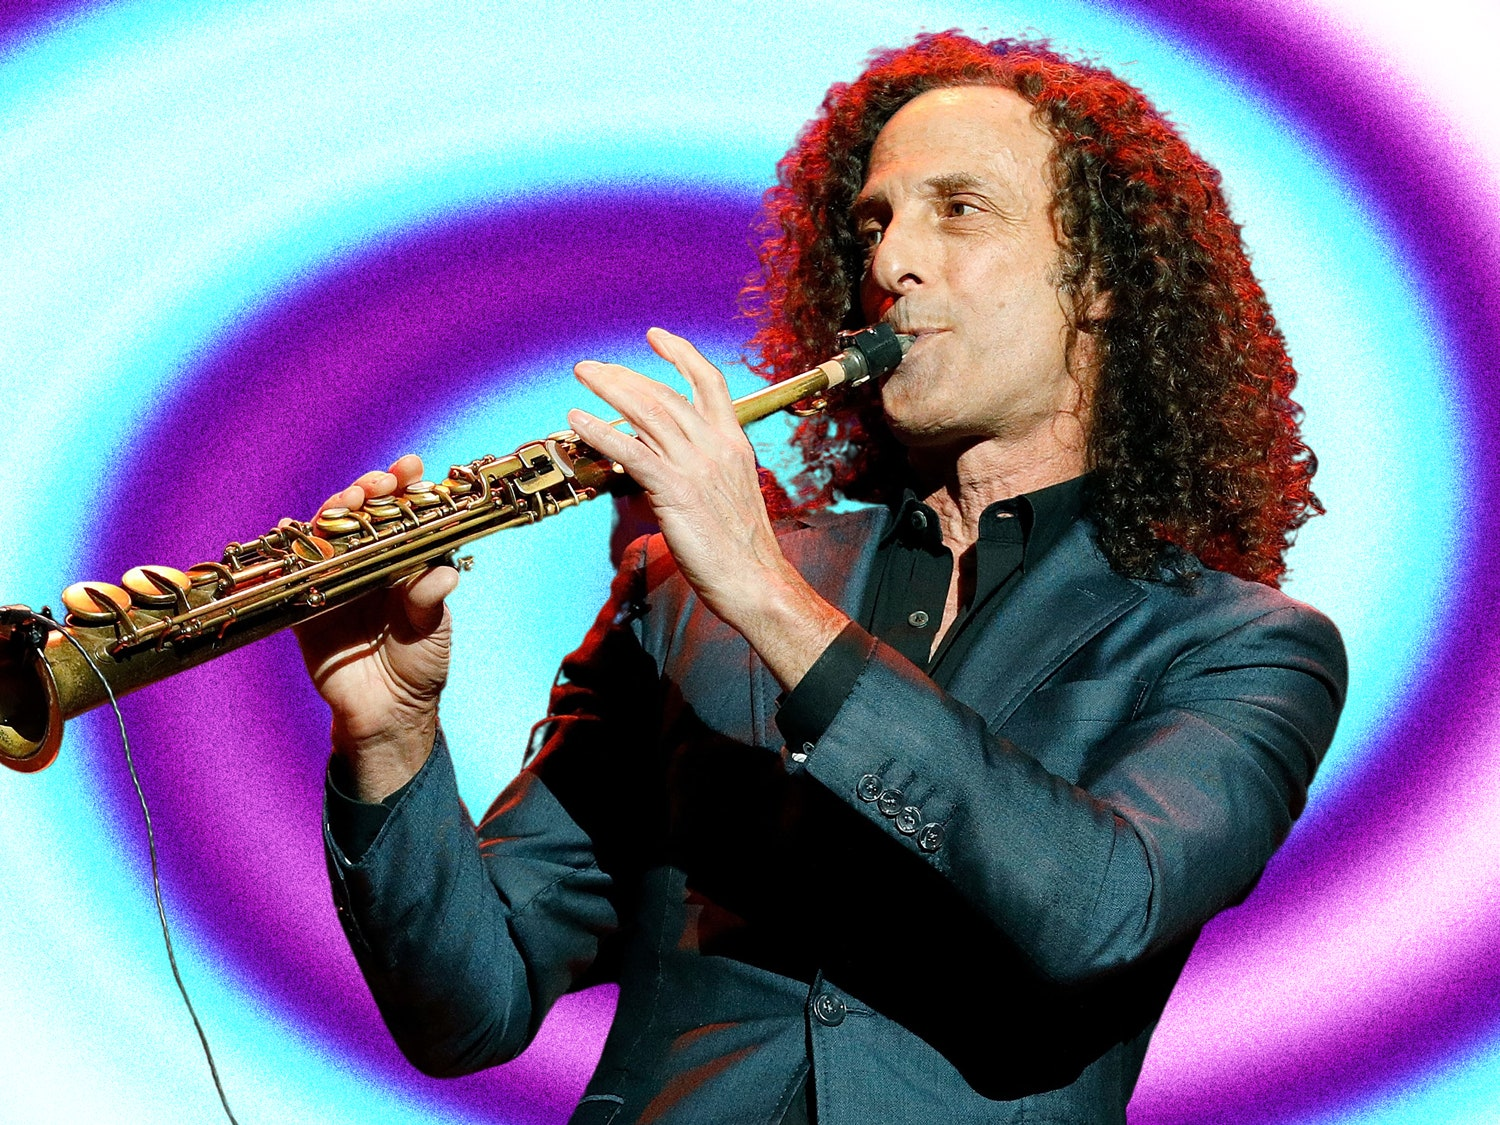

In [24]:
from IPython.display import Image
Image(filename="sources/kennyg.jpg")